# Wrangle and Analyze Data



## Introduction

This project focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). This Twitter account rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.
The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced.".We manually downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

### Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But we, because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? We're going to query Twitter's API to gather this valuable data.
Key Points

Before we start, herea are few points to keep in mind when data wrangling for this project:

    1) We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

    2) Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.

    3) Cleaning includes merging individual pieces of data according to the rules of tidy data.

    4) The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.



In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

## Gathering Data

#### Loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')

#### Loading the tweet image predictions from Udacity's servers

In [5]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [6]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

#### Loading Favorite count and retweet count from Twitter

In [7]:
consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
start = timer()
df_list = []
errors = []
for id in archive_df['tweet_id']:
    try:
        tweet = api.get_status(id, tweet_mode='extended')
        df_list.append({'tweet_id': str(tweet.id),
                        'favorite_count': int(tweet.favorite_count),
                        'retweet_count': int(tweet.retweet_count)})
    except Exception as e:
        print(str(id) + " : " + str(e))
        errors.append(id)
end = timer()

In [9]:
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

## Assessing Data

### Access df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**1. Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls**

**2. Timestamp and retweeted_status_timestamp is an object**

**3. Source columns have HTML tags**

**4. This dataset includes retweets, which means there is duplicated data**


In [13]:
# checks for duplicated entries in df
df[df.duplicated()].shape[0]

0

#### No Duplicates entry present

In [14]:
df["rating_numerator"].max()

1776

In [15]:
df["rating_denominator"].max()

170

#### rating_numerator contains max value 1776 and rating_denominator contains max value of 17

In [16]:
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
getting          2
actually         2
mad              2
not              2
infuriating      1
his              1
this             1
by               1
incredibly       1
light            1
old              1
life             1
such             1
my               1
space            1
all              1
unacceptable     1
officially       1
Name: name, dtype: int64

In [17]:
df[df.name.str.isupper()].name.value_counts()

JD    1
O     1
Name: name, dtype: int64

#### Dogs name have 'None', or 'a', or 'an.'  or 'O' or 'by' and some more lower case words as names


### Access image_df

In [18]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase

In [21]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# checks for duplicated entries in image_pred_df
image_df[image_df.duplicated()].shape[0]

0

In [23]:
# Count of duplicate jpg_url
image_df[image_df.jpg_url.duplicated()].shape[0]

66

#### jpg_url contains duplicate items means duplicate image links

In [24]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Access df_tweet_json

In [25]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [26]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
df_tweet_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [28]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,711363825979756544,3652,0
freq,1,5,179


In [29]:
df_tweet_json.sample(20)

,tweet_id,retweet_count,favorite_count
301,836648853927522308,626,0
1641,683857920510050305,1262,4163
338,832273440279240704,2673,12385
1051,742465774154047488,4382,7916
625,795076730285391872,6288,18139
1759,678675843183484930,1680,3155
1863,675354435921575936,18963,35178
1309,707021089608753152,1540,4433
448,819004803107983360,42228,95450
183,856526610513747968,2068,12446


In [30]:
df_tweet_json[df_tweet_json.duplicated()]

,tweet_id,retweet_count,favorite_count


#### No Duplicate entries present

## Quality Issues

#### df:

    1)Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id,         2)retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls 
    3)This dataset includes retweets, which means there is duplicated data 
    4)Timestamp and retweeted_status_timestamp is an object 
    5)The source column still has the HTML tags 
    6)Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names 
    7)Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer' 

#### image_df:

    1)dog breeds are not consistently in p1,p2,p3 columns 

#### df_tweet_json:

    1) Missing data 
    2) tweet_id is an object 

## Tidiness Issues

#### df:

    1)The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns

#### image_df:

       2)This data set is part of the same observational unit as the data in the archive_df 

#### df_tweet_json:

    3)This data set is also part of the same observational unit as the data in the archive_df 



## Cleaning Data
#### Making a copy of the dataframes before cleaning

In [31]:
df_clean = df.copy()
image_df_clean = image_df.copy()
tweet_json_clean = df_tweet_json.copy()

## DEFINE-CODE-TEST

    1)Convert the tweet_id in tweet_counts_clean into int64 type for merging.
    2)Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'
    3)Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
    4)Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes
    5)Convert the tweet_id in master_df into object type as it cannot be used further as maths operation
    6)Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column
    7)Remove Inconsistency in pred_breed
    8)Delete retweets
    9)Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
    10)Change the timestamp to correct datetime format
    11)Removing HTML tags from source column
    12)Dog ratings get standardized for denom of 10.



### DEFINE
   #### 1. Convert the tweet_id in tweet_json_clean dataframe into int type for merging into master dataframe
### CODE

In [33]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

### TEST

In [34]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: int64(1), object(2)
memory usage: 55.2+ KB


### DEFINE
   #### 2. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
### CODE


In [35]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True


In [36]:
image_df_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_df_clean.iterrows()]

In [37]:
## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
image_df_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

### TEST

In [38]:
image_df_clean.head()

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher




### DEFINE
  #### 3) Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype

### CODE


In [39]:
#Number of columns in df_clean
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [40]:
# as there are separate columns for dogs type 'doggo','floofer','pupper'and so on...
#i will convert them into one column
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [41]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [42]:
# Convert the stage in df_clean into categorical dtype
df_clean['stage'] = df_clean['stage'].astype('category')

In [43]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

### TEST

In [44]:
df_clean.info()
df_clean.stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 242.0+ KB


pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
                    0
Name: stage, dtype: int64

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 242.0+ KB


### DEFINE

   #### 4) Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

### CODE


In [46]:
from functools import reduce
data = [df_clean, image_df_clean, tweet_json_clean]
main_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

### TEST

In [47]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         320 non-null category
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
pred_breed                    1471 non-null object
retweet_count                 2073 

### DEFINE

#### 5) Convert the tweet_id in master_df into object type as there is no use for maths operation in tweet_id

### CODE


In [48]:
main_df['tweet_id'] = main_df['tweet_id'].astype('object')

In [49]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
stage                         320 non-null category
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
pred_breed                    1471 non-null object
retweet_count                 2073

### DEFINE

#### 6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

### CODE


In [50]:
words = main_df[main_df.name.str.islower()].name.unique()

In [51]:
main_df['name'] = main_df['name'].replace(words, np.nan)
main_df['name'] = main_df['name'].replace('None', np.nan)

In [52]:
main_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1986          Dook
1988          Hall
1989      Philippe
1992         Reese
1993       Cupcake
1997         Biden
1998          Fwed
2000     Genevieve
2001        Joshwa
2004       Timison
2007      Clarence
2008       Kenneth
2009       Churlie
2010       Bradlay
2011         Pipsy
2013          Gabe
2014         Clybe
2015          Dave
2017          Keet
2019        Klevin
2020         Carll
2025        

### TEST

In [53]:
main_df.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Tucker       10
Penny        10
Winston       8
Lola          8
Bo            8
Sadie         8
Toby          7
Daisy         7
Scout         6
Jax           6
Bella         6
Stanley       6
Rusty         6
Dave          6
Bailey        6
Koda          6
Milo          6
Oscar         5
Chester       5
Buddy         5
Leo           5
Louis         5
Larry         5
Alfie         5
Dexter        4
Jack          4
             ..
Butters       1
Fwed          1
Coleman       1
Comet         1
Rocco         1
Ralphie       1
Nigel         1
Dwight        1
Halo          1
Alexander     1
Beckham       1
Pete          1
Sephie        1
Flurpson      1
Rumble        1
Baron         1
Ulysses       1
Clifford      1
Zuzu          1
Tobi          1
Sobe          1
Jimbo         1
Pepper        1
Hector        1
Kuyu          1
Pilot         1
Chloe         1
Harrison      1
Amy           1
Jordy         1
Name: name, Length: 913,

### DEFINE
#### 7) Delete Retweets
### CODE


In [54]:
# Delete the rows which contains retweets
main_df = main_df.drop(main_df[(main_df['in_reply_to_status_id'].isnull() == False) | (main_df['retweeted_status_id'].isnull() == False)].index)

### TEST

In [55]:
main_df.shape[0]


1971

In [56]:
main_df.shape

(1971, 19)

### DEFINE
#### 8) Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
### CODE

In [57]:
# drop the reply status and retweet status columns
main_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

### TEST

In [58]:
main_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [59]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
pred_breed            1402 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
dtypes: category(1), int64(3), object(10)
memory usage: 217.9+ KB


### DEFINE
#### 9) Change the timestamp to correct datetime format
### CODE


In [60]:
main_df['timestamp'].sample(5)

1102    2016-03-06 17:52:42 +0000
1745    2015-12-02 03:40:57 +0000
301     2017-02-04 17:34:40 +0000
949     2016-05-02 16:38:15 +0000
402     2016-12-25 19:00:02 +0000
Name: timestamp, dtype: object

In [61]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

### TEST

In [62]:
main_df['timestamp'].sample(5)

1417   2015-12-30 16:51:48
353    2017-01-12 00:55:47
2043   2015-11-17 00:24:19
1750   2015-12-02 01:39:53
1361   2016-01-08 04:21:00
Name: timestamp, dtype: datetime64[ns]

In [63]:
main_df['timestamp'].describe()

count                    1971
unique                   1971
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

### DEFINE
#### 10) Removing HTML tags from source column
### CODE


In [64]:
href = main_df["source"].str.split('"', expand = True)
main_df["source"] = href[1]

### TEST

In [65]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


In [66]:
href

,0,1,2,3,4
0,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
1,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
3,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
4,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
5,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
6,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
7,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
8,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
9,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>


In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
pred_breed            1402 non-null object
retweet_count         1971 non-null object
favorite_count        1971 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(9)
memory usage: 217.9+ KB


In [68]:
main_df.describe()

,rating_numerator,rating_denominator,img_num
count,1971.000000,1971.000000,1971.000000
mean,12.223237,10.477423,1.201928
std,41.634034,6.853275,0.559020
min,0.000000,2.000000,1.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.000000
75%,12.000000,10.000000,1.000000
max,1776.000000,170.000000,4.000000


### DEFINE

#### 12. Standardize dog ratings

### CODE

In [83]:
ratings = main_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [85]:
main_df.rating_numerator = ratings
main_df['rating_numerator'] = main_df['rating_numerator'].astype('float64')

In [86]:
# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
main_df['rating_numerator'] = rating_num
main_df['rating_denominator'] = rating_denom

main_df = main_df.drop(main_df[((main_df['rating_denominator'] != 10) | (main_df['rating_numerator'] > 20))].index)

### TEST

In [88]:
main_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
         2.  ,  11.26,   1.  ])

In [89]:
main_df['rating_denominator'].unique()

array([10])

## Storing, Analyzing, and Visualizing Data

In [90]:
# storing main dataframe as csv
main_df.to_csv('main_df.csv', encoding='utf-8', index=False)

In [91]:
# read main_df.csv
df1 = pd.read_csv('main_df.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 14 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null object
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1347 non-null object
stage                 303 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
pred_breed            1401 non-null object
retweet_count         1968 non-null int64
favorite_count        1968 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 215.3+ KB


In [71]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.360418e+17,12.223237,10.477423,1.201928,2784.449518,8949.106545
std,6.752810e+16,41.634034,6.853275,0.559020,4697.662893,12267.799790
min,6.660209e+17,0.000000,2.000000,1.000000,16.000000,81.000000
25%,6.758656e+17,10.000000,10.000000,1.000000,628.500000,1997.000000
50%,7.088343e+17,11.000000,10.000000,1.000000,1367.000000,4147.000000
75%,7.880951e+17,12.000000,10.000000,1.000000,3239.000000,11402.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,79515.000000,132810.000000


## What are the 10 most frequent dog names?

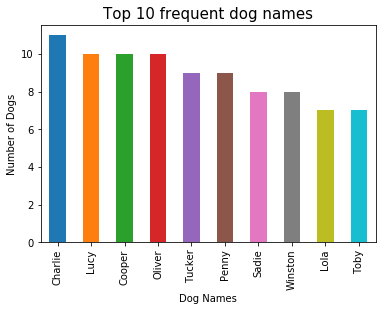

In [72]:
df1['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

###### Most of the dogs are of names: Charlie, OLiver,Cooper, Penny, Tucker, Lucy, Sadie, Winston, Daisy,Lola
###### Also, check the count below:


In [73]:
#Top 10 frequent dog names
df1['name'].value_counts()[0:10].sort_values(ascending=False)

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        7
Toby        7
Name: name, dtype: int64

## What are the 10 most frequent predicted dog breeds?

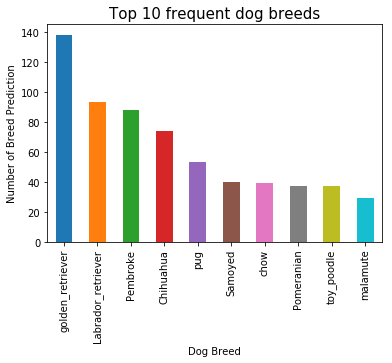

In [74]:
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

###### Most of the dogs have golden retriever, labrador retriever as breed which all are rated
###### Please check the top 10 rated dog breeds below:

In [75]:
#Top 10 frequent dog breeds
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False)

golden_retriever      138
Labrador_retriever     93
Pembroke               88
Chihuahua              74
pug                    53
Samoyed                40
chow                   39
Pomeranian             37
toy_poodle             37
malamute               29
Name: pred_breed, dtype: int64


### Findings of the analysis

    1)The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
    2)Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'
    3)tweet_id is set as object type as it is not going to use for calculation.
    4)A main dataframe is created using df_clean, image_df_clean, and tweet_json_clean dataframes
    5)Dog Names Issue got rectified
    6)Inconsistency in pred_breed got removed
    7)All retweets get deleted to get unique tweets
    8)The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed
    9)Timestamp format got corrected to datetime format
    10)Extra HTML tags from source column get refracted
    11)Dog ratings get standardized for denom of 10.


In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0